In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

In [2]:
# Pre-processing methods for the dataset

def get_array_of_matrix(dataset):
    array_of_images = []
    for row in dataset:
        row = np.asarray(row)
        matrix = np.reshape(row, (48, 48))
        array_of_images.append(matrix)
    return array_of_images


def crop_dataset(dataset, row, clmn):
    copped_dataset = []
    for image in dataset:
        y, x = image.shape
        first_x = x//2-(row//2)
        first_y = y//2-(clmn//2)
        copped_dataset.append(image[first_y:first_y + clmn, first_x:first_x + row])
    return copped_dataset


def reshape_dataset(dataset):
    reshaped_dataset = []
    for image in dataset:
        image = cv.resize(image, (48, 48)) # un po' bruttino
        image = image.flatten()
        reshaped_dataset.append(image)
    # reshaped_dataset = np.reshape(reshaped_dataset, (12660, 2304)) # un po' bruttino
    return reshaped_dataset


def apply_adaptive_threshold(dataset):
    dataset_with_filter = []
    for image in dataset:
        image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
        image = image.flatten()
        dataset_with_filter.append(image)
    dataset_with_filter = np.reshape(dataset_with_filter, (12660, 1600))
    return dataset_with_filter

In [3]:
x_train_gr_smpl = pd.read_csv("./datasets/x_train_gr_smpl.csv", delimiter=",", dtype=np.uint8)
y_train_smpl = pd.read_csv("./datasets/y_train_smpl.csv", delimiter=",", dtype=np.uint8)

In [4]:
y_train_smpl_0 = pd.read_csv("./datasets/y_train_smpl_0.csv", delimiter=",", dtype=np.uint8)

In [5]:
dataset = np.asmatrix(x_train_gr_smpl)
aom_dataset = get_array_of_matrix(dataset)
cropped_dataset = crop_dataset(aom_dataset, 40, 40) # un po' bruttino
#new_dataset = reshape_dataset(cropped_dataset)
new_dataset = apply_adaptive_threshold(cropped_dataset)

In [6]:
# add y_train_smpl to new_dataset ---KARAN
dataset = np.append(new_dataset, y_train_smpl, axis=1)
x = dataset[:, 0:1599]
y = dataset[:, -1]

In [15]:
X = x.reshape(len(x),-1)


# K-Means Clustering

In [8]:
kmeans = KMeans(n_clusters=10)

In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
f = np.unique(kmeans.labels_)
f

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
print(confusion_matrix(y,kmeans.labels_))
print("\n")
print(classification_report(y,kmeans.labels_))

[[ 372    0  474    0    0    1  150    3    7  403]
 [ 544    0  589    1    0   10  346    6    6  358]
 [  52    0   33    3    0    0  200    0    0  132]
 [ 151    0    4    2    0 1058   98    0    7    0]
 [ 288    0   73 1430    2    0  262    9   35    1]
 [ 246    0    0    0 1840    0   66    0    8    0]
 [  12  510    5    0    0    0   53    0  199    1]
 [  12    0   18    0    0    0  132    0    0   78]
 [ 377    0   17    1    3    2  259  632  770    9]
 [  48    0    1    0    0    0   63  118   70    0]]


              precision    recall  f1-score   support

           0       0.18      0.26      0.21      1410
           1       0.00      0.00      0.00      1860
           2       0.03      0.08      0.04       420
           3       0.00      0.00      0.00      1320
           4       0.00      0.00      0.00      2100
           5       0.00      0.00      0.00      2160
           6       0.03      0.07      0.04       780
           7       0.00      0.00 

In [34]:
error_rate =[]

for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(X_train,y_train)
    pred_i = km.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #Average predictions not equal to test values

Text(0, 0.5, 'Error Rate')

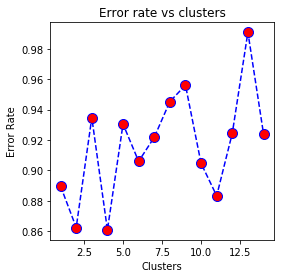

In [37]:
plt.figure(figsize=(4,4))
plt.plot(range(1,15),error_rate,color="blue",linestyle='dashed',marker="o",markerfacecolor="red",markersize=10)
plt.title("Error rate vs clusters")
plt.xlabel("Clusters")
plt.ylabel("Error Rate")

Using y_train_smpl_0 as y label

In [40]:
dataset0 = np.append(new_dataset, y_train_smpl_0, axis=1)

In [41]:
x0 = dataset[:, 0:1599]
y0 = dataset[:, -1]

In [42]:
kmeans0 = KMeans(n_clusters=2)

In [43]:
kmeans0.fit(x0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
print(confusion_matrix(y0,kmeans.labels_))
print("\n")
print(classification_report(y0,kmeans.labels_))

[[   0    9    0  155  456  387  399    1    3    0]
 [   0    7    0  349  568  568  351   10    6    1]
 [   0    0    0  201   34   50  132    0    0    3]
 [   0    7    0   99    3  151    0 1058    0    2]
 [   2   35    0  264   47  307    1    0   11 1433]
 [1841    7    0   68    0  244    0    0    0    0]
 [   0  202  509   53    0   15    1    0    0    0]
 [   0    0    0  131   18   12   79    0    0    0]
 [   8  769    0  269   15  370    9    2  627    1]
 [   0   71    0   63    1   48    0    0  117    0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1410
           1       0.01      0.00      0.00      1860
           2       0.00      0.00      0.00       420
           3       0.06      0.07      0.07      1320
           4       0.04      0.02      0.03      2100
           5       0.11      0.11      0.11      2160
           6       0.00      0.00      0.00       780
           7       0.00      0.00 

In [45]:
kmeans0.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
c = np.unique(kmeans0.labels_)
c

array([0, 1])